In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Caso de estudio - Clasificación de texto para detección de spam en SMS

Primero vamos a cargar los datos textuales del directorio `dataset` que debería estar en nuestra directorio de cuadernos. Este directorio se creó al ejecutar el script `fetch_data.py` desde la carpeta de nivel superior del repositorio *github*.

Además, aplicamos un preprocesamiento simple y dividimos el array de datos en dos partes:
1. `text`: una lista de listas, donde cada sublista representa el contenido de nuestros sms.
2. `y`: etiqueta SPAM vs HAM en binario, los 1 son mensajes de spam mientras que los 0 son mensajes ham (no spam).

In [5]:
import os

with open("SMSSpamCollection") as f:
    lines = [line.strip().split("\t") for line in f.readlines()]

text = [x[1] for x in lines]
y = [int(x[0] == "spam") for x in lines]

In [6]:
text[:10]

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had you

In [7]:
y[:10]

[0, 0, 1, 0, 0, 1, 0, 0, 1, 1]

In [8]:
print('Número de mensajes de ham/spam:', np.bincount(y))

Número de mensajes de ham/spam: [4827  747]


In [9]:
type(text)

list

In [10]:
type(y)

list

Ahora dividimos nuestro dataset en dos partes, una de entrenamiento y otra de test:

In [11]:
from sklearn.model_selection import train_test_split

text_train, text_test, y_train, y_test = train_test_split(text, y,
                                                          random_state=42,
                                                          test_size=0.25,
                                                          stratify=y)

In [12]:
text_train

['We can go 4 e normal pilates after our intro...',
 'That seems unnecessarily affectionate',
 'Thats cool! I am a gentleman and will treat you with dignity and respect.',
 "Nice line said by a broken heart- Plz don't cum 1 more times infront of me... Other wise once again I ll trust U... Good 9t:)",
 'Just sent you an email – to an address with incomm in it, is that right?',
 'Carry on not disturbing both of you',
 'I got it before the new year cos yetunde said she wanted to surprise you with it but when i didnt see money i returned it mid january before the  &lt;#&gt; day return period ended.',
 'hiya hows it going in sunny africa? hope u r avin a good time. give that big old silver back a big kiss from me.',
 'Yeah like if it goes like it did with my friends imma flip my shit in like half an hour',
 'S:-)kallis wont play in first two odi:-)',
 'Fuuuuck I need to stop sleepin, sup',
 'Yes we are chatting too.',
 'Just finished. Missing you plenty',
 'NEFT Transaction with reference n

In [13]:
text_test

['What is the plural of the noun research?',
 '"URGENT! This is the 2nd attempt to contact U!U have WON £1000CALL 09071512432 b4 300603t&csBCM4235WC1N3XX.callcost150ppmmobilesvary. max£7. 50"',
 'Ok lor.',
 'Its a big difference.  &lt;#&gt;  versus  &lt;#&gt;  every  &lt;#&gt; hrs',
 'Come to me right now, Ahmad',
 'Sun cant come to earth but send luv as rays. cloud cant come to river but send luv as rain. I cant come to meet U, but can send my care as msg to U. Gud evng',
 'Haf u found him? I feel so stupid da v cam was working.',
 'I dunno lei... Like dun haf...',
 'Free 1st week entry 2 TEXTPOD 4 a chance 2 win 40GB iPod or £250 cash every wk. Txt VPOD to 81303 Ts&Cs www.textpod.net custcare 08712405020.',
 'I got a call from a landline number. . . I am asked to come to anna nagar . . . I will go in the afternoon',
 "No rushing. I'm not working. I'm in school so if we rush we go hungry.",
 'Have you laid your airtel line to rest?',
 'Todays Voda numbers ending with 7634 are selected

Pasamos a usar CountVectorizer para convertir el texto a un modelo *bag-of-words*:

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

print('CountVectorizer parámetros por defecto')
CountVectorizer()

CountVectorizer parámetros por defecto


CountVectorizer()

In [15]:
vectorizer = CountVectorizer()
vectorizer.fit(text_train) # Ojo, el fit se aplica sobre train

X_train = vectorizer.transform(text_train)
X_test = vectorizer.transform(text_test)

In [16]:
print(len(vectorizer.vocabulary_))

7448


In [17]:
X_train.shape

(4180, 7448)

In [19]:
print(vectorizer.get_feature_names_out()[:20])

['00' '000' '000pes' '008704050406' '0089' '01223585236' '01223585334'
 '02' '0207' '02072069400' '02073162414' '02085076972' '021' '03' '04'
 '0430' '05' '050703' '0578' '06']


In [20]:
print(vectorizer.get_feature_names_out()[2000:2020])

['crash' 'crashed' 'crashing' 'crave' 'craving' 'craziest' 'crazy'
 'crazyin' 'crckt' 'cream' 'created' 'creative' 'credit' 'credited'
 'credits' 'creep' 'creepy' 'cres' 'cribbs' 'cricket']


In [21]:
print(X_train.shape)
print(X_test.shape)

(4180, 7448)
(1394, 7448)


### Entrenar un clasificador para texto

Ahora vamos a entrenar un clasificador, la regresión logística, que funciona muy bien como base para tareas de clasificación de textos:

In [22]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf

LogisticRegression()

In [23]:
clf.fit(X_train, y_train)

LogisticRegression()

Evaluamos el rendimiento del clasificador en el conjunto de test. Vamos a utilizar la función de *score* por defecto, que sería el porcentaje de patrones bien clasificados:

In [24]:
clf.score(X_test, y_test)

0.9842180774748924

También podemos calcular la puntuación en entrenamiento:

In [25]:
clf.score(X_train, y_train)

0.9973684210526316

# Visualizar las características más importantes

In [26]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # Obtener los coeficientes más importantes (negativos o positivos)
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # representarlos
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 2 * n_top_features+1), feature_names[interesting_coefficients], rotation=60, ha="right");

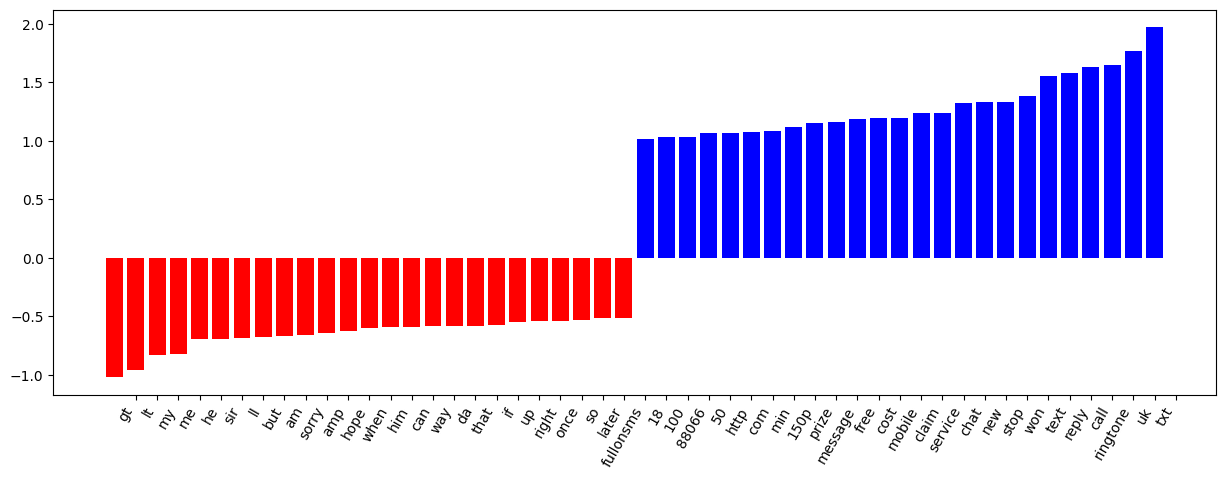

In [28]:
visualize_coefficients(clf, vectorizer.get_feature_names_out())

In [29]:
vectorizer = CountVectorizer(min_df=2)
vectorizer.fit(text_train)

X_train = vectorizer.transform(text_train)
X_test = vectorizer.transform(text_test)

clf = LogisticRegression()
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9956937799043062
0.9827833572453372


In [31]:
len(vectorizer.get_feature_names_out())

3438

In [32]:
print(vectorizer.get_feature_names_out()[:20])

['00' '000' '01223585334' '02' '0207' '02073162414' '03' '04' '05' '0578'
 '06' '07' '07123456789' '07781482378' '07821230901' '07xxxxxxxxx' '0800'
 '08000839402' '08000930705' '08000938767']


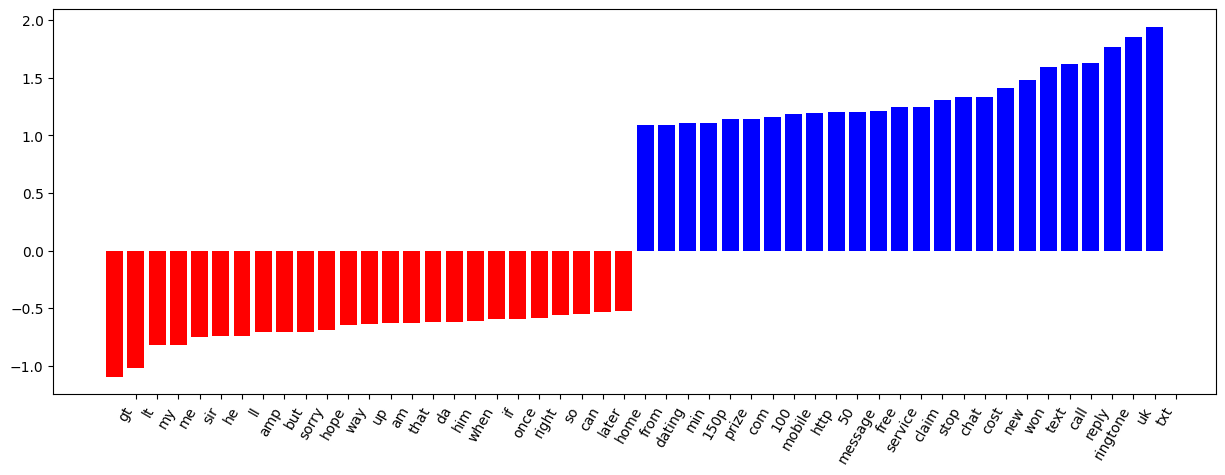

In [33]:
visualize_coefficients(clf, vectorizer.get_feature_names_out())

<img src="figures/supervised_scikit_learn.png" width="100%">

<div class="alert alert-success">
    <b>EJERCICIO</b>:
     <ul>
      <li>
      Utiliza TfidfVectorizer en lugar de CountVectorizer. ¿Mejoran los resultados? ¿Han cambiado los coeficientes?
      </li>
      <li>
      Cambia los parámetros min_df y ngram_range del TfidfVectorizer y el CountVectorizer. ¿Cambian las características que se seleccionan como más importantes?
      </li>
    </ul>
</div>